In [1]:
# Import dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
plt.rcParams["figure.figsize"] = (8, 6)

In [2]:
cleaned_clothing_data = pd.read_csv("../Womens_Clothing_Data_For_Tableau.csv")

In [3]:
cleaned_clothing_data.head(30)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Polarity Score,Sentiment
0,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.0000,Neutral
1,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.5093,Positive
2,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.3182,Positive
3,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,0.0000,Neutral
4,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,0.5106,Positive
5,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits,0.2960,Positive
6,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses,0.3182,Positive
7,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses,0.5562,Positive
8,10,1077,53,Dress looks like it's made of cheap material,Dress runs small esp where the zipper area run...,3,0,14,General,Dresses,Dresses,0.3612,Positive
9,12,1095,53,Perfect!!!,More and more i find myself reliant on the rev...,5,1,2,General Petite,Dresses,Dresses,0.6784,Positive


In [4]:
# Count the number of each rating  
print(Counter(cleaned_clothing_data['Rating']))

Counter({5: 10871, 4: 4289, 3: 2464, 2: 1360, 1: 691})


In [5]:
# Count the number of each rating for all columns
rating_type = cleaned_clothing_data.groupby('Rating').agg('count')
print(rating_type)

        Unnamed: 0  Clothing ID    Age  Title  Review Text  Recommended IND  \
Rating                                                                        
1              691          691    691    691          691              691   
2             1360         1360   1360   1360         1360             1360   
3             2464         2464   2464   2464         2464             2464   
4             4289         4289   4289   4289         4289             4289   
5            10871        10871  10871  10871        10871            10871   

        Positive Feedback Count  Division Name  Department Name  Class Name  \
Rating                                                                        
1                           691            691              691         691   
2                          1360           1360             1360        1360   
3                          2464           2464             2464        2464   
4                          4289           4289     

In [6]:
# Get the labels
rating_labels = rating_type["Clothing ID"].sort_values().index 
# Get the counts
rating_counts = rating_type["Clothing ID"].sort_values()

In [7]:
# Get the colors
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

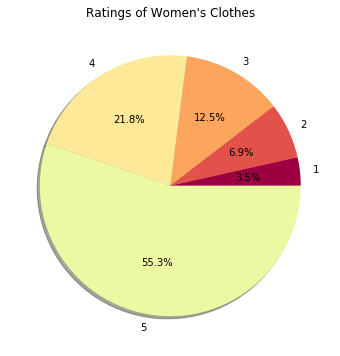

In [8]:
# Create the pie plot 
plt.pie(rating_counts, labels=rating_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.title("Ratings of Women's Clothes")
plt.show()


In [9]:
sentiment_type = cleaned_clothing_data.groupby('Sentiment').agg('count')
sentiment_type

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Polarity Score
Sentiment,,,,,,,,,,,,
Negative,1346,1346,1346,1346,1346,1346,1346,1346,1346,1346,1346,1346
Neutral,4740,4740,4740,4740,4740,4740,4740,4740,4740,4740,4740,4740
Positive,13589,13589,13589,13589,13589,13589,13589,13589,13589,13589,13589,13589


In [10]:
# Get the labels
sentiment_labels = sentiment_type["Clothing ID"].sort_values().index 
sentiment_labels
# Get the counts
sentiment_counts = sentiment_type["Clothing ID"].sort_values()
sentiment_counts

Sentiment
Negative     1346
Neutral      4740
Positive    13589
Name: Clothing ID, dtype: int64

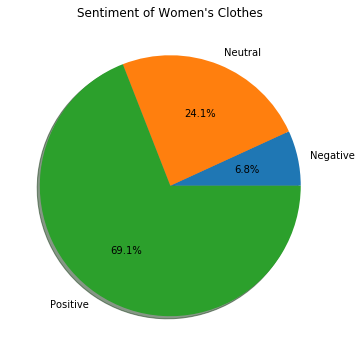

In [11]:
# Create the pie plot 
plt.pie(sentiment_counts, labels=sentiment_labels, autopct='%1.1f%%', shadow=True)
plt.title("Sentiment of Women's Clothes")
plt.show()